In [1]:
import sys
sys.path.insert(0,'C:\\Users\\Syahrir Ridha\\PycharmProjects\\NET_Solver\\')
import numpy as np
import pandas as pd
import torch
from geometry import *
from utils import Plot_Grid
from utils import *
from hard_boundary import *
from solver import *
from models import *
from mesh import *
from boundary import *
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
%matplotlib inline

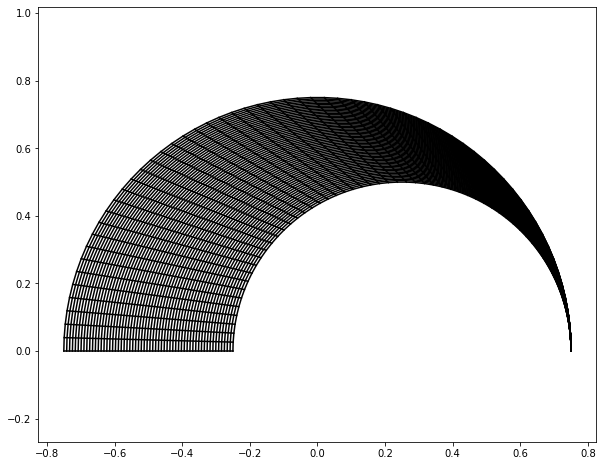

In [31]:
# mesh data
# pre processing Mesh data
nx, ny = 60, 60
xi_, eta_ = np.linspace(0,1,nx), np.linspace(0,1,ny)
xi,eta = np.meshgrid(xi_,eta_)
annulus = Analytical_Annulus(0.75, 0.5, 1.0)
grid = TFI(xi, eta, annulus)()
Plot_Grid(grid['x'], grid['y'],nx, ny)

In [32]:
len(xi)

60

In [33]:
grid['dxdeta'][0,:]

array([0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458,
       0.50847458, 0.50847458, 0.50847458, 0.50847458, 0.50847458])

In [5]:
#grid['y']

In [34]:
xi_, eta_ = np.linspace(0,1,nx), np.array([0.,1.])
xi_,eta_ = np.meshgrid(xi_,eta_)
annulus = Analytical_Annulus(0.75, 0.5, 1.0)
test_grid = TFI(xi_, eta_, annulus)()
# grid['dx_deta']

In [40]:
test_grid['dxdxi']

array([[3.        , 2.98305085, 2.96610169, 2.94915254, 2.93220339,
        2.91525424, 2.89830508, 2.88135593, 2.86440678, 2.84745763,
        2.83050847, 2.81355932, 2.79661017, 2.77966102, 2.76271186,
        2.74576271, 2.72881356, 2.71186441, 2.69491525, 2.6779661 ,
        2.66101695, 2.6440678 , 2.62711864, 2.61016949, 2.59322034,
        2.57627119, 2.55932203, 2.54237288, 2.52542373, 2.50847458,
        2.49152542, 2.47457627, 2.45762712, 2.44067797, 2.42372881,
        2.40677966, 2.38983051, 2.37288136, 2.3559322 , 2.33898305,
        2.3220339 , 2.30508475, 2.28813559, 2.27118644, 2.25423729,
        2.23728814, 2.22033898, 2.20338983, 2.18644068, 2.16949153,
        2.15254237, 2.13559322, 2.11864407, 2.10169492, 2.08474576,
        2.06779661, 2.05084746, 2.03389831, 2.01694915, 2.        ],
       [3.        , 2.98305085, 2.96610169, 2.94915254, 2.93220339,
        2.91525424, 2.89830508, 2.88135593, 2.86440678, 2.84745763,
        2.83050847, 2.81355932, 2.79661017, 2.7

In [39]:
eta_.shape

(2, 60)

In [53]:
grid['dxdxi'][0,:]

array([0.07704777, 0.07652364, 0.0759995 , 0.07547537, 0.07495123,
       0.0744271 , 0.07390296, 0.07337883, 0.0728547 , 0.07233056,
       0.07180643, 0.07128229, 0.07075816, 0.07023402, 0.06970989,
       0.06918575, 0.06866162, 0.06813749, 0.06761335, 0.06708922,
       0.06656508, 0.06604095, 0.06551681, 0.06499268, 0.06446854,
       0.06394441, 0.06342027, 0.06289614, 0.06237201, 0.06184787,
       0.06132374, 0.0607996 , 0.06027547, 0.05975133, 0.0592272 ,
       0.05870306, 0.05817893, 0.0576548 , 0.05713066, 0.05660653,
       0.05608239, 0.05555826, 0.05503412, 0.05450999, 0.05398585,
       0.05346172, 0.05293758, 0.05241345, 0.05188932, 0.05136518])

In [52]:
grid['dxdeta'][0,:]

array([0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408])

In [47]:
grid['y'][0,:]

array([9.18485099e-17, 9.12236901e-17, 9.05988703e-17, 8.99740505e-17,
       8.93492308e-17, 8.87244110e-17, 8.80995912e-17, 8.74747714e-17,
       8.68499516e-17, 8.62251318e-17, 8.56003120e-17, 8.49754922e-17,
       8.43506724e-17, 8.37258526e-17, 8.31010328e-17, 8.24762130e-17,
       8.18513932e-17, 8.12265734e-17, 8.06017536e-17, 7.99769338e-17,
       7.93521140e-17, 7.87272942e-17, 7.81024744e-17, 7.74776546e-17,
       7.68528348e-17, 7.62280150e-17, 7.56031953e-17, 7.49783755e-17,
       7.43535557e-17, 7.37287359e-17, 7.31039161e-17, 7.24790963e-17,
       7.18542765e-17, 7.12294567e-17, 7.06046369e-17, 6.99798171e-17,
       6.93549973e-17, 6.87301775e-17, 6.81053577e-17, 6.74805379e-17,
       6.68557181e-17, 6.62308983e-17, 6.56060785e-17, 6.49812587e-17,
       6.43564389e-17, 6.37316191e-17, 6.31067993e-17, 6.24819795e-17,
       6.18571598e-17, 6.12323400e-17])

In [27]:
eta[:,0]

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [ ]:

# class TFI:
#     def __init__(self, xi, eta, annulus, nx, ny):
#         """
#         Transfinite Interpolation for generating grid using analytical function
#         This Function maps the complex physical space into cartesian rectangular domain

#         # NOTE the input Xi and Eta should be meshed before using in this function

#         xi_, eta_ = np.linspace(0,1,nx), np.linspace(0,1,ny)
#         xi, eta = np.meshgrid(xi_, eta_)
#         annulus = {some function with implemented boundary conditions}
#         x = TFI(xi, eta, annulus).X()
#         y = TFI(xi, eta, annulus).Y()

#         :param xi: Xi is the computational space in the x axis
#         :param eta: Eta is the computational space in the y axis
#         :param annulus: Annulus is a function which computes the grid in physical plane wrt boundary conditions
#         :param Boundary: Boundary a boolean parameter to specify if TFI is used for generating boundary or satisfying
#                             boundary conditions for computation
#         """
#         self.xi = xi
#         self.eta = eta
#         self.annulus = annulus
#         # convert the numpy meshgrid into torch Tensor
#         self.xi = torch.tensor(self.xi, requires_grad=True).float().reshape(-1,1)
#         self.eta = torch.tensor(self.eta, requires_grad=True).float().reshape(-1,1)
#         self.nx, self.ny = nx, ny
#         # self.dx = (xi.max() - xi.min()) / len(xi)
#         # self.dy = (eta.max() - eta.min()) / len(eta)
#         # self.bound = Boundary

#     def __call__(self):
#         # get all the x related values
#         x_out = self.X()
#         x = x_out['x'].reshape(self.ny,self.nx)
#         dxdxi = x_out['dx_dxi'].reshape(self.ny,self.nx)
#         dxdeta = x_out['dx_deta'].reshape(self.ny,self.nx)

#         # get all the y related values
#         y_out = self.Y()
#         y = y_out['y'].reshape(self.ny,self.nx)
#         dydxi = y_out['dy_dxi'].reshape(self.ny,self.nx)
#         dydeta = y_out['dy_deta'].reshape(self.ny,self.nx)

#         return {'x':x, 'dx_dxi': dxdxi, 'dx_deta':dxdeta, 'y':y, 'dy_dxi':dydxi, 'dy_deta':dydeta}



#     def X(self):
#         """
#         X returns the interpolated x-axis values from xi and eta
#         :return: x axis values for physical plane in a dict format
#         """
#         out = ((1 - self.eta) * self.annulus.Xr(self.xi) + self.eta * self.annulus.Xl(self.xi) + (1 - self.xi)
#                * self.annulus.Xt(self.eta) + self.xi * self.annulus.Xb(self.eta) -
#                (self.xi * self.eta * self.annulus.Xl(torch.Tensor([1.])) + self.xi * (1 - self.eta) *
#                 self.annulus.Xr(torch.Tensor([1.])) + self.eta * (1 - self.xi) * self.annulus.Xl(torch.Tensor([0.])) +
#                 (1 - self.xi) * (1 - self.eta) * self.annulus.Xr(torch.Tensor([0.]))))


#         dx_dxi = self.compute_grad(out, self.xi)
#         dx_deta = self.compute_grad(out, self.eta)

#         return {'x': out.detach().numpy(), 'dx_dxi': dx_dxi.detach().numpy(), 'dx_deta': dx_deta.detach().numpy()}
#         #return out

#     def Y(self):
#         """
#         Y returns the interpolated y-axis values from xi and eta
#         :return: Y axis values for physical plane in a dict format
#         """
#         out = ((1 - self.eta) * self.annulus.Yr(self.xi) + self.eta * self.annulus.Yl(self.xi) + (1 - self.xi)
#                * self.annulus.Yt(self.eta) + self.xi * self.annulus.Yb(self.eta) -
#                (self.xi * self.eta * self.annulus.Yl(torch.Tensor([1.])) + self.xi * (1 - self.eta) *
#                 self.annulus.Yr(torch.Tensor([1.])) + self.eta * (1 - self.xi) * self.annulus.Yl(torch.Tensor([0.])) +
#                 (1 - self.xi) * (1 - self.eta) * self.annulus.Yr(torch.Tensor([0.]))))

#         dy_dxi = self.compute_grad(out, self.xi)
#         dy_deta = self.compute_grad(out, self.eta)

#         return {'y': out.detach().numpy(), 'dy_dxi': dy_dxi.detach().numpy(), 'dy_deta': dy_deta.detach().numpy()}
#         #return out

#     def compute_grad(self, outputs, inputs):
#         gradient, = torch.autograd.grad(outputs, inputs, grad_outputs=outputs.data.new(outputs.shape).fill_(1),
#                                         create_graph=True, retain_graph=True, only_inputs=True)
#         return gradient


# class Analytical_Annulus:
#     def __init__(self, r_outer, r_inner, eccentricity):
#         """
#         Analytical Annulus maps the boundary values of a eccentric annulus from a computational domain into a physical
#          domain for performing computational analysis using analytical scheme.
#         ==>> The outer circle is positioned at the center of origin, while the inner circle position is calculated
#         from the eccentricity
#         :param r_outer: The radius of the outer circle
#         :param r_inner: The radius of the inner circle
#         :param eccentricity: The eccentricity describing the position of inner circle within outer circle
#         """
#         self.r_outer, self.r_inner = r_outer, r_inner
#         # condition to check if radius of outer circle is larger than inner
#         if r_outer <= r_inner:
#             raise ValueError('Outer circle should be greater than inner circle')

#         # condition to check if eccentricity is not greater than 1from
#         # the eccentricity should range between -1 to 1.
#         if eccentricity > 1.0:
#             raise ValueError('Eccentricity should not be greater than 1')
#         else:
#             self.ecc = eccentricity

#         # calculate the position of the inner circle wrt the eccentricity
#         self.x_inner = (self.ecc * (2 * self.r_outer - 2 * self.r_inner)) / 2
#         # The y axis for center of inner circle is assumed to be
#         self.y_inner = 0

#     def Xt(self, x):
#         """
#         Xt calculates the x-axis values in physical domain to implement top-boundary conditions
#         :param x: xi -- (X axis values in computational domain)
#         :return: x -- (X- axis values in physical domain)
#         """
#         out = (1 - x) * torch.Tensor([np.pi])
#         return torch.cos(out)* self.r_outer

#     def Yt(self, x):
#         """
#         Yt calculates the y-axis values in physical domain to implement top-boundary conditions
#         :param x: eta -- (Y-axis values in computational domain)
#         :return: y -- (Y-axis values in physical domain)
#         """
#         out = (1 - x) * torch.Tensor([np.pi])
#         return torch.sin(out)* self.r_outer

#     def Xb(self, x):
#         """
#         Xb calculates the x-axis values in physical domain to implement bottom-boundary conditions
#         :param x: xi -- (X axis values in computational domain)
#         :return: x -- (X- axis values in physical domain)
#         """
#         out = (1 - x) * torch.Tensor([np.pi])
#         return torch.cos(out) * self.r_inner + self.x_inner

#     def Yb(self, x):
#         """
#         Yb calculates the y-axis values in physical domain to implement bottom-boundary conditions
#         :param x: eta -- (Y-axis values in computational domain)
#         :return: y -- (Y-axis values in physical domain)
#         """
#         out = (1 - x) * torch.Tensor([np.pi])
#         return torch.sin(out) * self.r_inner

#     def Xl(self, x):
#         """
#         Xl calculates the x-axis values in physical domain to implement left-boundary conditions
#         :param x: xi -- (X axis values in computational domain)
#         :return: x -- (X- axis values in physical domain)
#         """
#         # interpolation ==>> (0,1)* diff + min
#         diff = -self.r_outer - (self.x_inner - self.r_inner)
#         out = diff * x + (self.x_inner - self.r_inner)
#         return out

#     def Yl(self, x):
#         """
#         Yl calculates the y-axis values in physical domain to implement left-boundary conditions
#         :param x: eta -- (Y-axis values in computational domain)
#         :return: y -- (Y-axis values in physical domain)
#         """
#         out = x * 0
#         return out

#     def Xr(self, x):
#         """
#         Xr calculates the x-axis values in physical domain to implement right-boundary conditions
#         :param x: xi -- (X axis values in computational domain)
#         :return: x -- (X- axis values in physical domain)
#         """
#         # below trick is implemented to cast any range of values
#         # diff = (max - min) ==>> (0,1)* diff + min
#         diff = self.r_outer - (self.x_inner + self.r_inner)
#         out = diff * x + (self.x_inner + self.r_inner)
#         return out

#     def Yr(self, x):
#         """
#         Yr calculates the y-axis values in physical domain to implement right-boundary conditions
#         :param x: eta -- (Y-axis values in computational domain)
#         :return: y -- (Y-axis values in physical domain)
#         """
#         out = x * 0
#         return out

#     def check(self):
#         """
#         Test function to check if all tye boundary conditions are met.
#         """
#         # the following four conditions should be satisfied for a logical boundary data implementation
#         assert self.Xb(0) == self.Xl(0), f'The bottom and left boundary should be in order'
#         assert self.Xb(1) == self.Xr(0), f'The bottom and right boundary should be in order'
#         assert self.Xr(1) == self.Xt(1), f'The right and top boundary should be in order'
#         assert self.Xl(1) == self.Xt(0), f'The left and top boundary should be in order'
#         print('PASS : Boundary Conditions in Ord/er !!')
	
# ########################################################################################################################################



In [ ]:
nx, ny = 50, 50
xi_, eta_ = np.linspace(0,1,nx), np.array([0.,1.])
xi,eta = np.meshgrid(xi_,eta_)
annulus = Analytical_Annulus(0.75, 0.5, 0.0)
grid_test = TFI(xi, eta, annulus, nx, 2)()

In [ ]:
grid_test['dy_deta']

In [ ]:
np.allclose(grid['y'], grid_test['y'])

In [ ]:
grid['dydeta']